# Constructing VLE Diagrams using Raoult's law

Teng-Jui Lin

Content adapted from UW CHEME 375, Chemical Engineering Computer Skills, in Spring 2021.


- Python skills and numerical methods
  - Control Flow
- ChemE applications
  - Vapor-liquid equilibrium (VLE) diagrams
    - x/y diagrams
    - Txy diagrams

## Solving binary vapor liquid equilibrium (VLE) problems

**Problem Statement.** Methanol and ethanol are in binary vapor liquid equilibrium at a pressure of 1 atm. Assuming ideal gas and solution behavior, generate an x/y diagram and a Txy diagram for the methanol-ethanol system.

**Solution.** (Similar solution method as solving nonlinear systems.) Assuming ideal behavior, Raoult's law states that the partial pressure of one component is equal to the vapor pressure of the component times its liquid mole fraction

$$
P_i = y_i P = x_i P_i^*(T)
$$

where the vapor pressure can be determined by Antoine's equation

$$
\log P_i^*(T) = A - \dfrac{B}{T+C}
$$

Note that Antoine's equation may take different form and units when using different tabulated values.

Let methanol be M and ethanol be E, we have the following equations, known, and unknown values.

### Known values

- Units of values in Antoine's equation
    - P [=] mmHg
    - T [=] deg C
- Parameters of Antoine's equation (FRB Table B.4)

|Compound|A|B|C|Valid T Range|
|-:|-:|-:|-:|-:
|Methanol (M)|8.08097|1582.271|239.726|14.9 - 83.7|
|Ethanol (E)|8.11220|1592.864|226.184|19.6 - 93.4|

- Known liquid composition
    - $x_M$ varies from 0.0 to 1.0 continuously (methanol)
- Known pressure
    - $P = 1 \ \mathrm{atm}$


### Unknown variables

- Composition of liquid phase: $x_E$
- Composition of vapor phase: $y_M$, $y_E$
- Temperature: $T$

### Governing equations

The raw equations are:

- Raoult's law and Antoine's equation
    - $y_M P = x_M P_M^*(T) = x_M 10^{\wedge}(A_M - \frac{B_M}{C_M+T})$
    - $y_E P = x_E P_E^*(T) = x_E 10^{\wedge}(A_E - \frac{B_E}{C_E+T})$
- conservation of mass (mole, since nonreactive)
    - $y_M + y_E = 1$
    - $x_M + x_E = 1$

Convert all the equations so they're in the general form of $F(x) = 0$:

- Raoult's law and Antoine's equation
    - $y_M P - x_M 10^{\wedge}(A_M - \frac{B_M}{C_M+T}) = 0$
    - $y_E P - x_E 10^{\wedge}(A_E - \frac{B_E}{C_E+T}) = 0$
- conservation of mass
    - $1 - y_M - y_E = 0$
    - $1 - x_M - x_E = 0$

We can now solve the four nonlinear equations with respect to the four unknown variables given the known values at each $x_M$ sample point using control flow loop.

### Implementation

In this approach, we use [`scipy.optimize.fsolve()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html) to solve the nonlinear system directly at each $x_A$. We use a for loop to iterate through the sample points of $x_A$.

In [1]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

In [2]:
def system(X, params):
    '''System of nonlinear equations'''
    # X -> unknown variables
    # params -> known values
    xe, ym, ye, T = X
    xm, P, Am, Bm, Cm, Ae, Be, Ce = params
    # set up system of equations
    # check form of Antoine's eqn (exp or 10^)
    eqns = np.array([
        ym*P - xm*10**(Am - Bm/(Cm + T)),
        ye*P - xe*10**(Ae - Be/(Ce + T)),
        1 - ym - ye,
        1 - xm - xe
    ])
    return eqns

In [3]:
# known values
P = 1 * 760  # atm -> mmHg
step = 0.02
xm = np.arange(0, 1+step, step)
params = [xm, P,
          8.08097, 1582.271, 239.726,
          8.11220, 1592.864, 226.184]

# initial guesses
X0 = [0.5, 0.5, 0.5, 100]

In [4]:
# initialize arrays to store iteration results
xm_len = len(xm)
xe = np.zeros(xm_len)
ym = np.zeros(xm_len)
ye = np.zeros(xm_len)
T = np.zeros(xm_len)

In [5]:
# iterate to solve for VLE curve
for i in range(xm_len):
    params[0] = xm[i]
    xe[i], ym[i], ye[i], T[i] = fsolve(system, X0, params)

In [6]:
# plot settings
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams.update({
    'font.family': 'Arial',  # Times New Roman, Calibri
    'font.weight': 'normal',
    'mathtext.fontset': 'cm',
    'font.size': 18,
    
    'lines.linewidth': 2,
    
    'axes.linewidth': 2,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.titleweight': 'bold',
    'axes.titlesize': 18,
    'axes.labelweight': 'bold',
    
    'xtick.major.size': 8,
    'xtick.major.width': 2,
    'ytick.major.size': 8,
    'ytick.major.width': 2,
    
    'figure.dpi': 80,
    
    'legend.framealpha': 1, 
    'legend.edgecolor': 'black',
    'legend.fancybox': False,
    'legend.fontsize': 14
})

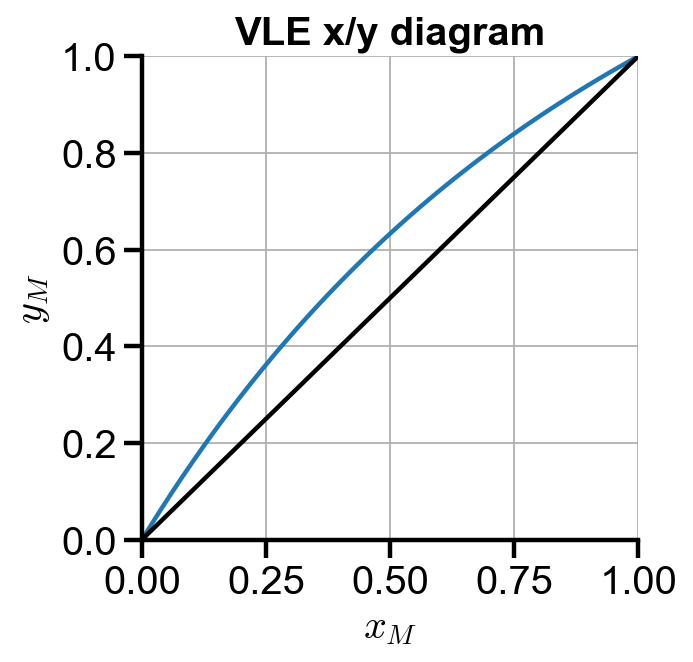

In [7]:
# x/y diagram
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(xm, ym)
ax.plot([0, 1], [0, 1], color='black')
ax.set_xlabel('$x_M$')
ax.set_ylabel('$y_M$')
ax.set_title('VLE x/y diagram')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.grid(True)

Text(0.35, 69.2, 'Two-phase')

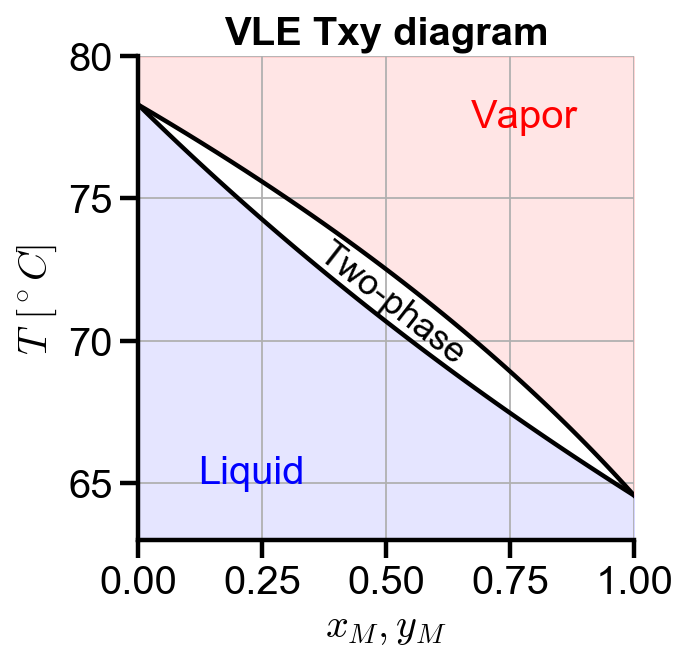

In [8]:
# main Txy diagram
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(xm, T, color='black')
ax.plot(ym, T, color='black')
ax.set_xlabel('$x_M, y_M$')
ax.set_ylabel('$T \ [^\circ C]$')
ax.set_title('VLE Txy diagram')
ax.set_xlim(0, 1)
ymin = 63
ymax = 80
ax.set_ylim(ymin, ymax)
ax.grid(True)

# colored phase regions
ax.fill_between(xm, ymin, T, color='blue', alpha=0.1)
ax.fill_between(ym, T, ymax, color='red', alpha=0.1)
ax.text(0.12, 65, 'Liquid', color='blue')
ax.text(0.67, 77.5, 'Vapor', color='red')
ax.text(0.35, 69.2, 'Two-phase', color='black', rotation=-38, size=16)

The temperature range of the Txy diagram is within the valid T range of the Antoine's coefficients.